In [787]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import duckdb
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.api import OLS
from scipy.stats import bootstrap
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


## Poverty

In [788]:
# importing cleaned csv from previous phase
poverty_concat = pd.read_csv('poverty_concat.csv')
poverty_concat.head()

,State,TotalPop,PovertyTotal,PovertyPercent,Year
0,Alabama,4751,796,16.7,2013
1,Alaska,696,76,10.9,2013
2,Arizona,6645,1345,20.2,2013
3,Arkansas,2940,504,17.1,2013
4,California,38050,5675,14.9,2013


## Income 1984-2018

In [789]:
# importing cleaned csv from previous phase
income_df = pd.read_csv('income_df.csv')
income_df.head()

,State,2018,2017,2016,2015,2014,2013,2013.1,2012,2011,...,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984
0,Alabama,49936.0,51113.0,47221.0,44509.0,42278.0,47320.0,41381.0,43464.0,42590.0,...,25082.0,25808.0,24346.0,23357.0,21284.0,19948.0,19734.0,19132.0,18333.0,17310.0
1,Alaska,68734.0,72231.0,75723.0,75112.0,67629.0,72472.0,61137.0,63648.0,57431.0,...,42931.0,41802.0,40612.0,39298.0,36006.0,33103.0,33233.0,31356.0,34782.0,32356.0
2,Arizona,62283.0,61125.0,57100.0,52248.0,49254.0,52611.0,50602.0,47044.0,48621.0,...,30510.0,29358.0,30737.0,29224.0,28552.0,26435.0,26749.0,25500.0,23877.0,21425.0
3,Arkansas,49781.0,48829.0,45907.0,42798.0,44922.0,39376.0,39919.0,39018.0,41302.0,...,23039.0,23882.0,23435.0,22786.0,21433.0,20172.0,18827.0,18730.0,17451.0,15674.0
4,California,70489.0,69759.0,66637.0,63636.0,60487.0,60794.0,57528.0,57020.0,53367.0,...,34073.0,34903.0,33664.0,33290.0,33009.0,30287.0,30146.0,29010.0,26981.0,25287.0


In [790]:
# importing cleaned csv from previous phase
income_melt = pd.read_csv('income_melt_df.csv')
income_melt.head()

,State,Year,Median_Income
0,Alabama,2018,49936.0
1,Alaska,2018,68734.0
2,Arizona,2018,62283.0
3,Arkansas,2018,49781.0
4,California,2018,70489.0


# Unemployment

In [791]:
# importing cleaned csv from previous phase
job_df = pd.read_csv('job_df.csv')
job_melt = pd.read_csv('job_melt.csv')

## Crime 1979-2022

In [792]:
# importing cleaned csv from previous phase
crime_df = pd.read_csv('crime_df.csv')
crime_df

,Year,State_Abbreviation,State,Population,Violent_Crime,Homicide,Rape,Robbery,Aggravated_Assault,Property_Crime,Burglary
0,1979,AK,Alaska,406000,1994,54,292,445,1203,23193,5616
1,1979,AL,Alabama,3769000,15578,496,1037,4127,9918,144372,48517
2,1979,AR,Arkansas,2180000,7984,198,595,1626,5565,70949,21457
3,1979,AZ,Arizona,2450000,14528,219,1120,4305,8884,177977,48916
4,1979,CA,California,22696000,184087,2952,12239,75767,93129,1511021,496310
...,...,...,...,...,...,...,...,...,...,...,...
2239,2022,VA,Virginia,8683619,20624,641,2791,3360,13832,148845,10944
2240,2022,WA,Washington,7785786,29504,400,3208,6766,19130,262437,43987
2241,2022,WV,West Virginia,1775156,5213,95,909,210,3999,23663,3561
2242,2022,WI,Wisconsin,5892539,17889,322,2452,2350,12765,80703,9137


# Hypothesis 1:
### Income is a better predictor for robbery than burglary across the states.

### Train model for predicting robbery using income

In [793]:
income_robbery = duckdb.sql('''SELECT  Robbery,C.State, C.Year, Median_Income
                            FROM crime_df AS C JOIN income_melt AS I
                            ON C.State = I.State AND C.Year = I.Year
                            ORDER BY C.Year ASC''').df()
income_robbery = pd.get_dummies(income_robbery,prefix='', \
                                prefix_sep='', columns=['State'], dtype=int, drop_first=True)
income_robbery.head()

,Robbery,Year,Median_Income,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,547,1984,32356.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3833,1984,17310.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1587,1984,15674.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4003,1984,21425.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,83924,1984,25287.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [868]:
X_inc_rob_train, X_inc_rob_test, y_inc_rob_train, y_inc_rob_test = \
                  train_test_split(income_robbery.iloc[:,1:],
                                   income_robbery['Robbery'], test_size=0.3, shuffle=False)
X_inc_rob_train = sm.add_constant(X_inc_rob_train)
inc_rob_model =sm.OLS(y_inc_rob_train, X_inc_rob_train).fit()
inc_rob_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Robbery   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:32:07   Log-Likelihood:                -12412.
No. Observations:                1260   AIC:                         2.493e+04
Df Residuals:                    1207   BIC:                         2.520e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.58e+05   1.43e+05      1.102      0.271   -1.23e+05    4.39e+05
Year            -142.7647     72.781     -1.962      0.050    -285.555       0.026
Median_Income     -0.0215      0.060     -0.359      0.719      -0.139       0.096
Alaska          3.151e+04   2204.289     14.295      0.000    2.72e+04    3.58e+04
Arizona        -1035.4917   1336.968     -0.775      0.439   -3658.531    1587.547
Arkansas        1.003e+04   1426.814      7.027      0.000    7226.769    1.28e+04
California       3.84e+04   2220.543     17.291      0.000     3.4e+04    4.28e+04
Colorado        5580.3937   1492.655      3.739      0.000    2651.907    8508.881
Connecticut     1626.6636   1633.512      0.996      0.320   -1578.175    4831.503
Delaware        1.973e+04   1731.471     11.397      0.000    1.63e+04    2.31e+04
Florida         4637.2982   1770.615      2.619      0.009    1163.473    8111.123
Georgia        -4948.9291   1455.753     -3.400      0.001   -7805.018   -2092.841
Hawaii          2.096e+04   1856.419     11.289      0.000    1.73e+04    2.46e+04
Idaho           4.429e+04   2439.097     18.159      0.000    3.95e+04    4.91e+04
Illinois        1320.5061   1787.577      0.739      0.460   -2186.598    4827.610
Indiana         -729.1780   1346.025     -0.542      0.588   -3369.986    1911.630
Iowa             1.96e+04   1669.031     11.742      0.000    1.63e+04    2.29e+04
Kansas          1.106e+04   1470.916      7.518      0.000    8173.175    1.39e+04
Kentucky        6291.4086   1365.933      4.606      0.000    3611.543    8971.275
Louisiana      -3002.3242   1335.833     -2.248      0.025   -5623.137    -381.512
Maine           4.055e+04   2310.134     17.552      0.000     3.6e+04    4.51e+04
Maryland       -4742.7882   1763.320     -2.690      0.007   -8202.300   -1283.276
Massachusetts  -2688.4871   1545.208     -1.740      0.082   -5720.080     343.106
Michigan       -4308.4277   1563.858     -2.755      0.006   -7376.609   -1240.246
Minnesota       3298.2247   1495.737      2.205      0.028     363.691    6232.758
Mississippi     8659.9175   1419.978      6.099      0.000    5874.017    1.14e+04
Missouri       -2912.6382   1368.137     -2.129      0.033   -5596.829    -228.448
Montana         4.533e+04   2477.388     18.296      0.000    4.05e+04    5.02e+04
Nebraska        2.219e+04   1743.448     12.728      0.000    1.88e+04    2.56e+04
Nevada          3655.7015   1427.490      2.561      0.011     855.064    6456.339
New Hampshire   3.895e+04   2381.444     16.356      0.000    3.43e+04    4.36e+04
New Jersey     -4483.9625   1806.692     -2.482      0.013   -8028.568    -939.357
New Mexico      1.173e+04   1462.580      8.019      0.000    8858.950    1.46e+04
New York        2.565e+04   2017.668     12.711      0.000    2.17e+04    2.96e+04
North Caroli

In [795]:
#make predictions
X_inc_rob_test = sm.add_constant(X_inc_rob_test)
inc_rob_preds = inc_rob_model.predict(X_inc_rob_test)
print( f"MAE for predicting robbery using income: {mean_absolute_error(y_inc_rob_test, inc_rob_preds)}")
print( f"RSME for predicting robbery using income: {root_mean_squared_error(y_inc_rob_test, inc_rob_preds)}")

MAE for predicting robbery using income: 3903.3094398751614
RSME for predicting robbery using income: 7759.480589023324


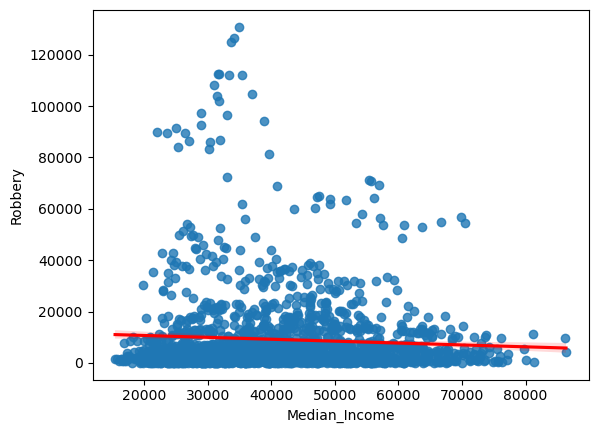

In [796]:
sns.regplot(x = income_robbery['Median_Income'], y = income_robbery['Robbery'], line_kws = {"color":"red"});

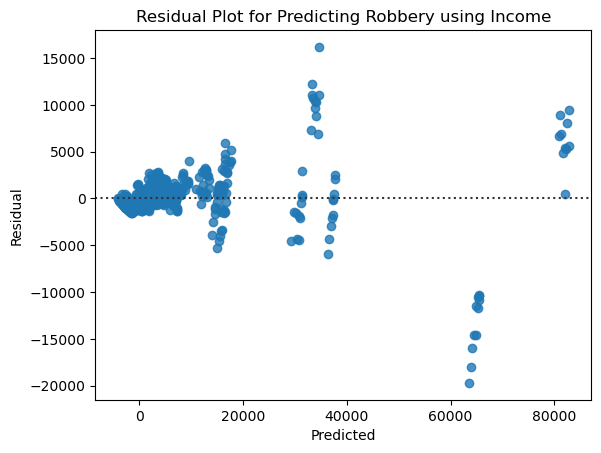

In [797]:
inc_rob_df = pd.DataFrame({"Preds": inc_rob_preds, "Actual": y_inc_rob_test})
ax = sns.residplot(x = inc_rob_preds, y = y_inc_rob_test)
ax.set(xlabel = "Predicted", ylabel= "Residual", title = "Residual Plot for Predicting Robbery using Income");

MAE for predicting robbery using income: 0.2995251380922235
RSME for predicting robbery using income: 0.3845879612087546


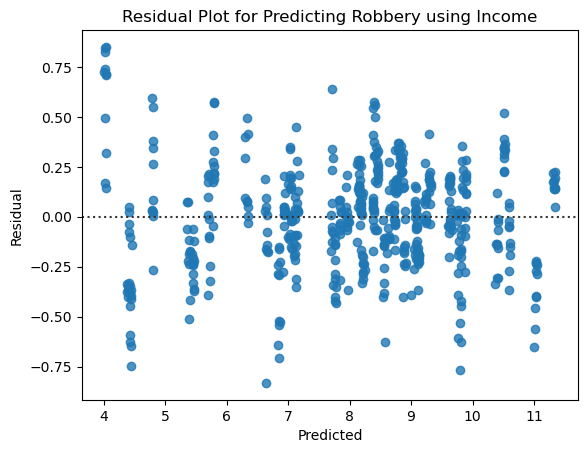

In [798]:
income_robbery['log_robbery'] = np.log(income_robbery['Robbery'])

#print(income_robbery.iloc[:, 47:])
#print((income_robbery.iloc[:, 1:-1]).columns)

X_inc_rob_train, X_inc_rob_test, y_inc_rob_train, y_inc_rob_test = \
                  train_test_split(income_robbery.iloc[:,1:-1],
                                   income_robbery['log_robbery'], test_size=0.3, shuffle=False)
X_inc_rob_train = sm.add_constant(X_inc_rob_train)
inc_rob_model =sm.OLS(y_inc_rob_train, X_inc_rob_train).fit()

X_inc_rob_test = sm.add_constant(X_inc_rob_test)
inc_rob_preds = inc_rob_model.predict(X_inc_rob_test)
print( f"MAE for predicting robbery using income: {mean_absolute_error(y_inc_rob_test, inc_rob_preds)}")
print( f"RSME for predicting robbery using income: {root_mean_squared_error(y_inc_rob_test, inc_rob_preds)}")


inc_rob_df = pd.DataFrame({"Preds": inc_rob_preds, "Actual": y_inc_rob_test})
ax = sns.residplot(x = inc_rob_preds, y = y_inc_rob_test)
ax.set(xlabel = "Predicted", ylabel= "Residual", title = "Residual Plot for Predicting Robbery using Income");

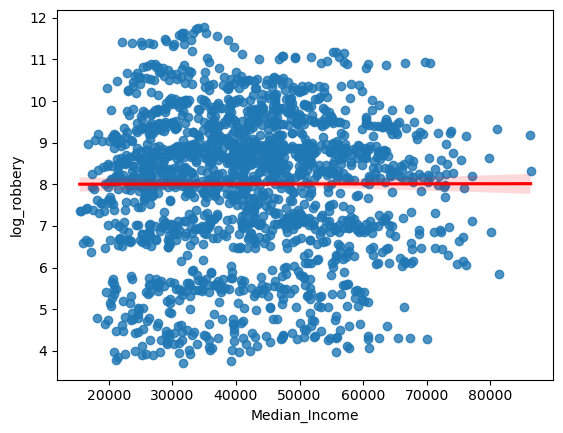

In [799]:
sns.regplot(x = income_robbery['Median_Income'], y = income_robbery['log_robbery'], line_kws = {"color":"red"});

In [800]:
# for each of the states, get the predicted value and the actual value
X_inc_rob_test2 = X_inc_rob_test
X_inc_rob_test2['actual_robbery'] = y_inc_rob_test
X_inc_rob_test2['preds_robbery'] = inc_rob_preds
inc_rob_melt = pd.melt(X_inc_rob_test2, id_vars=['const','Year', 'Median_Income', 'actual_robbery','preds_robbery'], \
                       var_name = 'State', value_name='Binary')
inc_rob_melt = inc_rob_melt[ inc_rob_melt['Binary']==1]
inc_rob_melt.head()

,const,Year,Median_Income,actual_robbery,preds_robbery,State,Binary
40,1.0,2010,57848.0,6.386879,6.347382,Alaska,1
90,1.0,2011,57431.0,6.356108,6.355366,Alaska,1
140,1.0,2012,63648.0,6.445720,6.334015,Alaska,1
190,1.0,2013,61137.0,6.434547,6.351259,Alaska,1
229,1.0,2013,72472.0,6.434547,6.301135,Alaska,1


In [801]:
twenty_states = pd.DataFrame(np.random.choice(inc_rob_melt['State'], size =20, replace = False))
#print(twenty_states)
chosen_stats_robbery = duckdb.sql(''' SELECT * FROM inc_rob_melt
                                  WHERE Year>=2014 AND Year<=2018 AND State IN (SELECT * FROM twenty_states)''').df()
chosen_stats_robbery.head()

,const,Year,Median_Income,actual_robbery,preds_robbery,State,Binary
0,1.0,2014,44922.0,7.619233,7.836800,Arkansas,1
1,1.0,2015,42798.0,7.657755,7.852333,Arkansas,1
2,1.0,2016,45907.0,7.661527,7.844725,Arkansas,1
3,1.0,2017,48829.0,7.599902,7.837944,Arkansas,1
4,1.0,2018,49781.0,7.373374,7.839875,Arkansas,1


# Income and Robbery for 2016

In [802]:
robbery_2016= chosen_stats_robbery[chosen_stats_robbery['Year']==2016]
robbery_2016_actual = robbery_2016.drop(columns=['const','Binary','preds_robbery'])
robbery_2016_actual['Type'] = 'Actual'
robbery_2016_actual = robbery_2016_actual.rename(columns = {'actual_robbery':'robbery'})

robbery_2016_preds = robbery_2016.loc[:,['Year','Median_Income', 'preds_robbery','State']]
robbery_2016_preds = robbery_2016_preds.rename(columns = {'preds_robbery':'robbery'})
robbery_2016_preds['Type'] = 'Predicted'
print(robbery_2016_actual.head())
robbery_2016_preds.head()

    Year  Median_Income   robbery        State    Type
2   2016        45907.0  7.661527     Arkansas  Actual
7   2016        75923.0  7.905073  Connecticut  Actual
12  2016        61386.0  9.788582     Illinois  Actual
17  2016        45369.0  8.122965     Kentucky  Actual
22  2016        70218.0  8.224164    Minnesota  Actual


,Year,Median_Income,robbery,State,Type
2,2016,45907.0,7.844725,Arkansas,Predicted
7,2016,75923.0,8.545309,Connecticut,Predicted
12,2016,61386.0,10.397656,Illinois,Predicted
17,2016,45369.0,8.154357,Kentucky,Predicted
22,2016,70218.0,8.376328,Minnesota,Predicted


In [803]:
robbery_2016_preds_actual = pd.concat([robbery_2016_actual , robbery_2016_preds], ignore_index=True, axis=0)
#robbery_2016_preds_actual

[Text(0.5, 1.0, 'Income and Robbery for 20 Random States (2016)')]

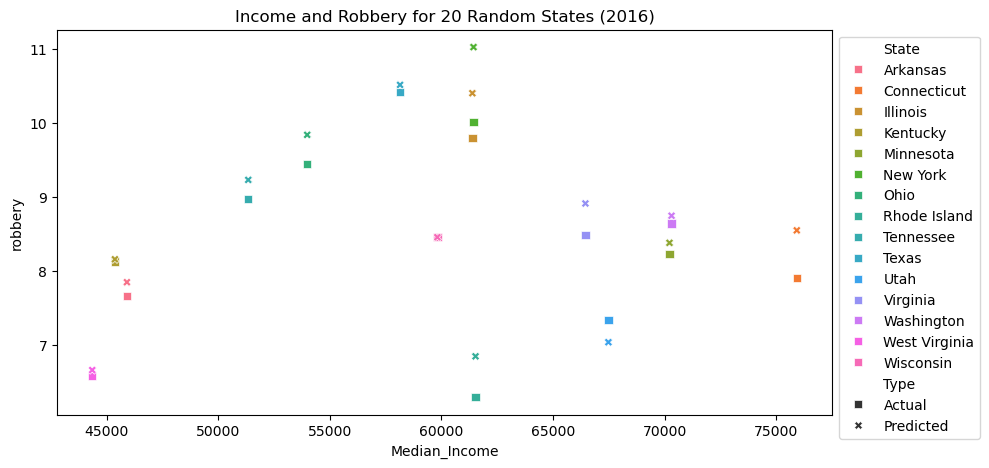

In [804]:
markers = {"Predicted":'X', 'Actual':'s'}
g = sns.scatterplot(data = robbery_2016_preds_actual, x='Median_Income',y='robbery',\
                hue='State', style = 'Type', markers = markers)
g.figure.set_size_inches(10,5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(title = "Income and Robbery for 20 Random States (2016)")

# Income and Robbery for 2017

In [805]:
robbery_2017= chosen_stats_robbery[chosen_stats_robbery['Year']==2017]
robbery_2017_actual = robbery_2017.drop(columns=['const','Binary','preds_robbery'])
robbery_2017_actual['Type'] = 'Actual'
robbery_2017_actual = robbery_2017_actual.rename(columns = {'actual_robbery':'robbery'})

robbery_2017_preds = robbery_2017.loc[:,['Year','Median_Income', 'preds_robbery','State']]
robbery_2017_preds = robbery_2017_preds.rename(columns = {'preds_robbery':'robbery'})
robbery_2017_preds['Type'] = 'Predicted'
robbery_2017_preds_actual = pd.concat([robbery_2017_actual , robbery_2017_preds], ignore_index=True, axis=0)
#print(robbery_2017_actual.head())
#robbery_2017_preds.head()

[Text(0.5, 1.0, 'Income and Robbery for 20 Random States (2017)')]

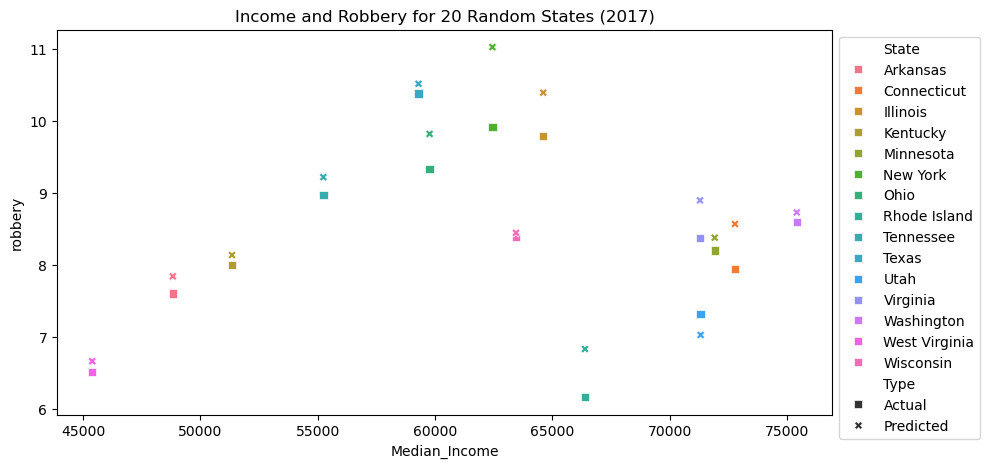

In [806]:
markers = {"Predicted":'X', 'Actual':'s'}
g = sns.scatterplot(data = robbery_2017_preds_actual, x='Median_Income',y='robbery',\
                hue='State', style = 'Type', markers = markers)
g.figure.set_size_inches(10,5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(title = "Income and Robbery for 20 Random States (2017)")

# Income and Robbery for 2018

In [807]:
robbery_2018= chosen_stats_robbery[chosen_stats_robbery['Year']==2018]
robbery_2018_actual = robbery_2018.drop(columns=['const','Binary','preds_robbery'])
robbery_2018_actual['Type'] = 'Actual'
robbery_2018_actual = robbery_2018_actual.rename(columns = {'actual_robbery':'robbery'})

robbery_2018_preds = robbery_2018.loc[:,['Year','Median_Income', 'preds_robbery','State']]
robbery_2018_preds = robbery_2018_preds.rename(columns = {'preds_robbery':'robbery'})
robbery_2018_preds['Type'] = 'Predicted'
robbery_2018_preds_actual = pd.concat([robbery_2018_actual , robbery_2018_preds], ignore_index=True, axis=0)

[Text(0.5, 1.0, 'Income and Robbery for 20 Random States (2018)')]

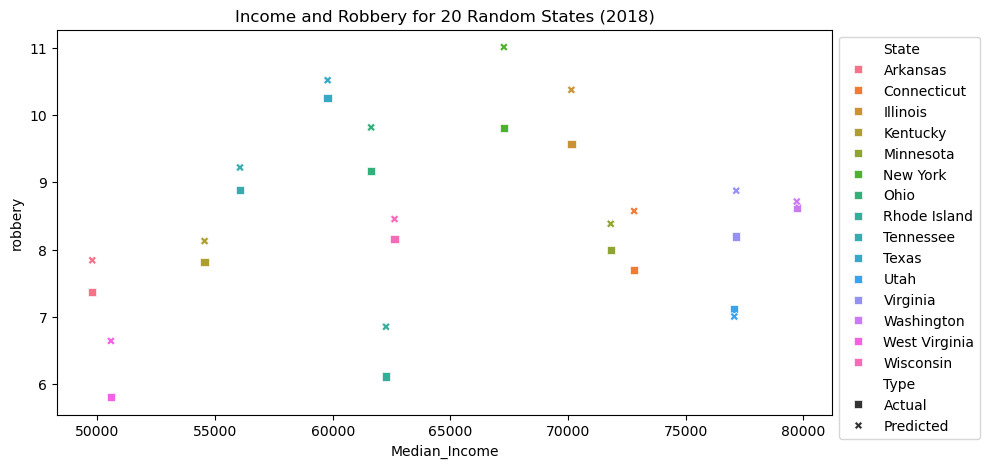

In [808]:
markers = {"Predicted":'X', 'Actual':'s'}
g = sns.scatterplot(data = robbery_2018_preds_actual, x='Median_Income',y='robbery',\
                hue='State', style = 'Type', markers = markers)
g.figure.set_size_inches(10,5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(title = "Income and Robbery for 20 Random States (2018)")

### Now train model for predicting burglary given income

In [809]:
income_burglary = duckdb.sql('''SELECT  Burglary,C.State, C.Year, Median_Income
                            FROM crime_df AS C JOIN income_melt AS I
                            ON C.State = I.State AND C.Year = I.Year
                            ORDER BY C.Year ASC''').df()
income_burglary = pd.get_dummies(income_burglary,prefix='', \
                                prefix_sep='', columns=['State'], dtype=int, drop_first=True)
income_burglary.head()

,Burglary,Year,Median_Income,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,6184,1984,32356.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39970,1984,17310.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20810,1984,15674.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52327,1984,21425.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,443094,1984,25287.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [869]:
X_inc_burg_train, X_inc_burg_test, y_inc_burg_train, y_inc_burg_test = \
                  train_test_split(income_burglary.iloc[:,1:],
                                   income_burglary['Burglary'], test_size=0.3, shuffle=False)
X_inc_burg_train = sm.add_constant(X_inc_burg_train)
inc_burg_model =sm.OLS(y_inc_burg_train, X_inc_burg_train).fit()
inc_burg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Burglary   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     438.5
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:36:28   Log-Likelihood:                -13892.
No. Observations:                1260   AIC:                         2.789e+04
Df Residuals:                    1207   BIC:                         2.816e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.142e+04   4.69e+05      0.110      0.913   -8.68e+05    9.71e+05
Year            -396.9595    235.809     -1.683      0.093    -859.601      65.682
Median_Income      0.4774      0.196      2.434      0.015       0.093       0.862
Alaska          1.173e+05   8401.424     13.963      0.000    1.01e+05    1.34e+05
Arizona        -7607.5904   4407.871     -1.726      0.085   -1.63e+04    1040.350
Arkansas        2.122e+04   4567.284      4.645      0.000    1.23e+04    3.02e+04
California      1.357e+05   7826.658     17.342      0.000     1.2e+05    1.51e+05
Colorado        2696.7255   4752.989      0.567      0.571   -6628.312     1.2e+04
Connecticut     1.603e+04   5437.528      2.948      0.003    5361.548    2.67e+04
Delaware        9.848e+04   7336.310     13.424      0.000    8.41e+04    1.13e+05
Florida         5.731e+04   6426.496      8.918      0.000    4.47e+04    6.99e+04
Georgia        -7689.2392   4824.790     -1.594      0.111   -1.72e+04    1776.668
Hawaii          5.611e+04   6198.938      9.052      0.000    4.39e+04    6.83e+04
Idaho           8.412e+04   6665.597     12.620      0.000     7.1e+04    9.72e+04
Illinois       -3964.4108   5358.530     -0.740      0.460   -1.45e+04    6548.657
Indiana        -3719.1269   4362.625     -0.852      0.394   -1.23e+04    4840.044
Iowa            3.016e+04   4912.883      6.140      0.000    2.05e+04    3.98e+04
Kansas          2.071e+04   4672.468      4.433      0.000    1.15e+04    2.99e+04
Kentucky        1.688e+04   4492.061      3.757      0.000    8065.623    2.57e+04
Louisiana      -3216.5449   4280.643     -0.751      0.453   -1.16e+04    5181.783
Maine           8.326e+04   6631.849     12.555      0.000    7.03e+04    9.63e+04
Maryland       -8438.7009   5346.057     -1.578      0.115   -1.89e+04    2049.896
Massachusetts  -5029.6992   4946.730     -1.017      0.309   -1.47e+04    4675.445
Michigan       -5748.6953   5116.115     -1.124      0.261   -1.58e+04    4288.771
Minnesota       4034.1461   4838.779      0.834      0.405   -5459.207    1.35e+04
Mississippi     1.591e+04   4509.800      3.528      0.000    7060.550    2.48e+04
Missouri       -4463.8781   4377.186     -1.020      0.308   -1.31e+04    4123.861
Montana         1.226e+05   8099.968     15.137      0.000    1.07e+05    1.39e+05
Nebraska        6.712e+04   6100.209     11.003      0.000    5.52e+04    7.91e+04
Nevada          3.152e+04   5140.645      6.132      0.000    2.14e+04    4.16e+04
New Hampshire   1.039e+05   7813.635     13.301      0.000    8.86e+04    1.19e+05
New Jersey     -1.136e+04   5533.691     -2.053      0.040   -2.22e+04    -504.072
New Mexico      2.612e+04   4717.332      5.537      0.000    1.69e+04    3.54e+04
New York         1.78e+04   5549.780      3.207      0.001    6907.390    2.87e+04
North Caroli

In [811]:
X_inc_burg_test = sm.add_constant(X_inc_burg_test)
inc_burg_preds = inc_burg_model.predict(X_inc_burg_test)
print( f"MAE for predicting burglary using income: {mean_absolute_error(y_inc_burg_test, inc_burg_preds)}")
print( f"RSME for predicting burglary using income: {root_mean_squared_error(y_inc_burg_test, inc_burg_preds)}")

MAE for predicting burglary using income: 17550.1657301236
RSME for predicting burglary using income: 25884.34927546979


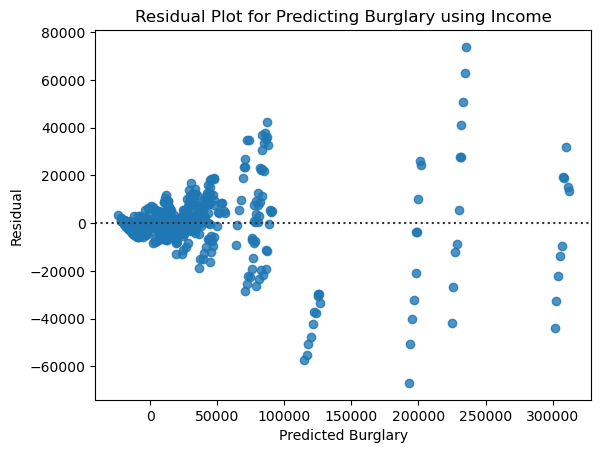

In [812]:
inc_burg_df = pd.DataFrame({"Preds": inc_burg_preds, "Actual": y_inc_burg_test})
ax = sns.residplot(x = inc_burg_preds, y = y_inc_burg_test)
ax.set(xlabel = "Predicted Burglary", ylabel= "Residual", title = "Residual Plot for Predicting Burglary using Income");

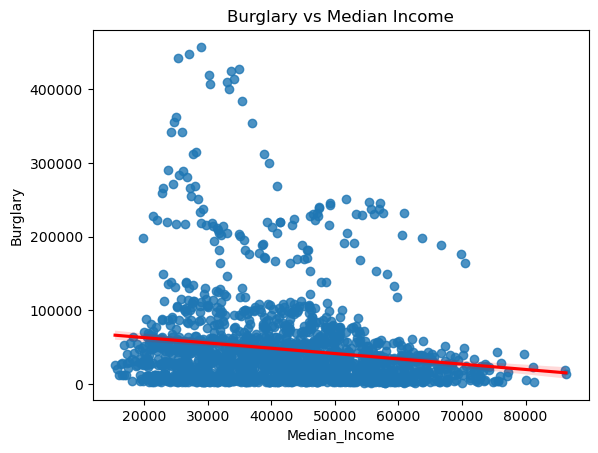

In [813]:
sns.regplot(x = income_burglary['Median_Income'], y = income_burglary['Burglary'], line_kws = {"color":"red"});
plt.title("Burglary vs Median Income");

MAE for predicting burglary using income: 0.1894950245621107
RSME for predicting burglary using income: 0.25217229608909597


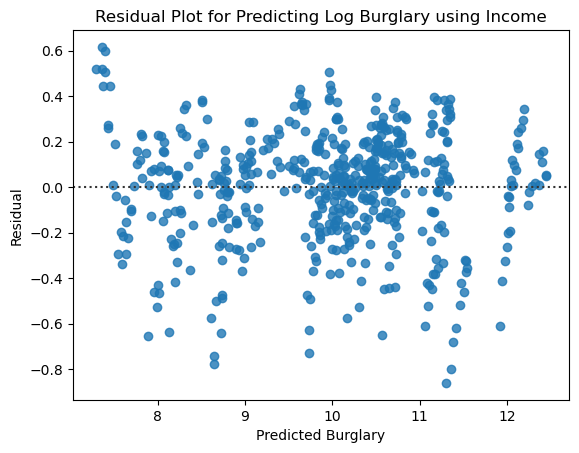

In [814]:
income_burglary['log_burglary'] = np.log(income_burglary['Burglary'])

X_inc_burg_train, X_inc_burg_test, y_inc_burg_train, y_inc_burg_test = \
                  train_test_split(income_burglary.iloc[:,1:-1],
                                   income_burglary['log_burglary'], test_size=0.3, shuffle=False)
X_inc_burg_train = sm.add_constant(X_inc_burg_train)
inc_burg_model =sm.OLS(y_inc_burg_train, X_inc_burg_train).fit()

X_inc_burg_test = sm.add_constant(X_inc_burg_test)
inc_burg_preds = inc_burg_model.predict(X_inc_burg_test)
print( f"MAE for predicting burglary using income: {mean_absolute_error(y_inc_burg_test, inc_burg_preds)}")
print( f"RSME for predicting burglary using income: {root_mean_squared_error(y_inc_burg_test, inc_burg_preds)}")

inc_burg_df = pd.DataFrame({"Preds": inc_burg_preds, "Actual": y_inc_burg_test})
ax = sns.residplot(x = inc_burg_preds, y = y_inc_burg_test)
ax.set(xlabel = "Predicted Burglary", ylabel= "Residual", title = "Residual Plot for Predicting Log Burglary using Income");

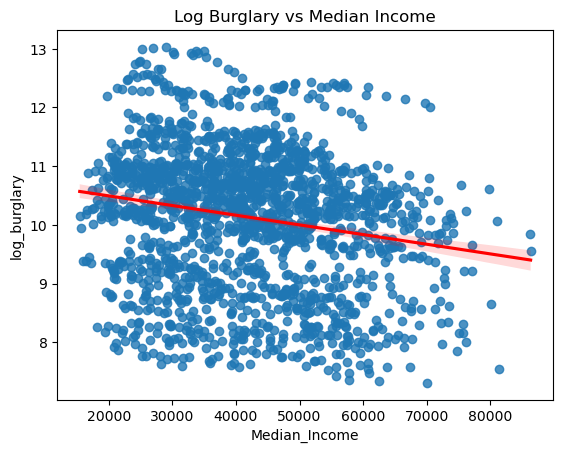

In [815]:
sns.regplot(x = income_burglary['Median_Income'], 
            y = income_burglary['log_burglary'], 
            line_kws = {"color":"red"})
plt.title("Log Burglary vs Median Income");

# Now plot predicted vs actual when using income to predict burglary

In [816]:
X_inc_burg_test2 = X_inc_burg_test
X_inc_burg_test2['actual_burglary'] = y_inc_burg_test
X_inc_burg_test2['preds_burglary'] = inc_burg_preds
inc_burg_melt = pd.melt(X_inc_burg_test2, id_vars=['const','Year', 'Median_Income', 'actual_burglary','preds_burglary'], \
                       var_name = 'State', value_name='Binary')
inc_burg_melt = inc_burg_melt[ inc_burg_melt['Binary']==1]
inc_burg_melt.head()

,const,Year,Median_Income,actual_burglary,preds_burglary,State,Binary
40,1.0,2010,57848.0,8.040769,8.225878,Alaska,1
90,1.0,2011,57431.0,7.955776,8.224721,Alaska,1
140,1.0,2012,63648.0,7.989560,8.155338,Alaska,1
190,1.0,2013,61137.0,7.978311,8.175717,Alaska,1
229,1.0,2013,72472.0,7.978311,8.059143,Alaska,1


In [817]:
chosen_stats_burglary = duckdb.sql(''' SELECT * FROM inc_burg_melt
                                  WHERE Year>=2014 AND Year<=2018 AND State IN (SELECT * FROM twenty_states)''').df()
chosen_stats_burglary.head()

,const,Year,Median_Income,actual_burglary,preds_burglary,State,Binary
0,1.0,2014,44922.0,10.119244,9.903828,Arkansas,1
1,1.0,2015,42798.0,10.036750,9.920227,Arkansas,1
2,1.0,2016,45907.0,10.078029,9.882807,Arkansas,1
3,1.0,2017,48829.0,10.015431,9.847311,Arkansas,1
4,1.0,2018,49781.0,9.879195,9.832075,Arkansas,1


# Income and Burglary for 2016

In [818]:
burglary_2016= chosen_stats_burglary[chosen_stats_burglary['Year']==2016]
burglary_2016_actual = burglary_2016.drop(columns=['const','Binary','preds_burglary'])
burglary_2016_actual['Type'] = 'Actual'
burglary_2016_actual = burglary_2016_actual.rename(columns = {'actual_burglary':'burglary'})

burglary_2016_preds = burglary_2016.loc[:,['Year','Median_Income', 'preds_burglary','State']]
burglary_2016_preds = burglary_2016_preds.rename(columns = {'preds_burglary':'burglary'})
burglary_2016_preds['Type'] = 'Predicted'
burglary_2016_preds_actual = pd.concat([burglary_2016_actual , burglary_2016_preds], ignore_index=True, axis=0)
#burglary_2016_preds_actual

[Text(0.5, 1.0, 'Income and Burglary for 20 Random States (2016)')]

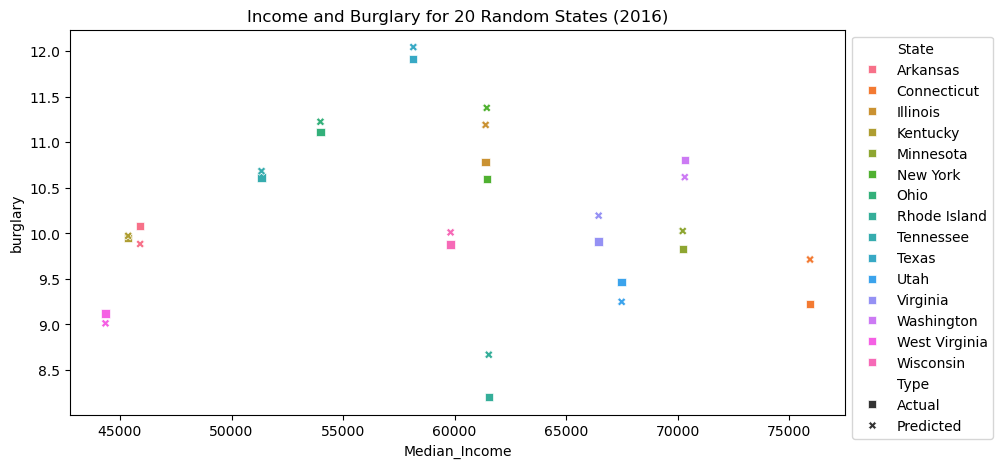

In [819]:
g = sns.scatterplot(data = burglary_2016_preds_actual, x='Median_Income',y='burglary',\
                hue='State', style = 'Type', markers = markers)
g.figure.set_size_inches(10,5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(title = "Income and Burglary for 20 Random States (2016)")

# Income and Burglary for 2017

In [820]:
burglary_2017= chosen_stats_burglary[chosen_stats_burglary['Year']==2017]
burglary_2017_actual = burglary_2017.drop(columns=['const','Binary','preds_burglary'])
burglary_2017_actual['Type'] = 'Actual'
burglary_2017_actual = burglary_2017_actual.rename(columns = {'actual_burglary':'burglary'})

burglary_2017_preds = burglary_2017.loc[:,['Year','Median_Income', 'preds_burglary','State']]
burglary_2017_preds = burglary_2017_preds.rename(columns = {'preds_burglary':'burglary'})
burglary_2017_preds['Type'] = 'Predicted'
burglary_2017_preds_actual = pd.concat([burglary_2017_actual , burglary_2017_preds], ignore_index=True, axis=0)
#burglary_2017_preds_actual

[Text(0.5, 1.0, 'Income and Burglary for 20 Random States (2017)')]

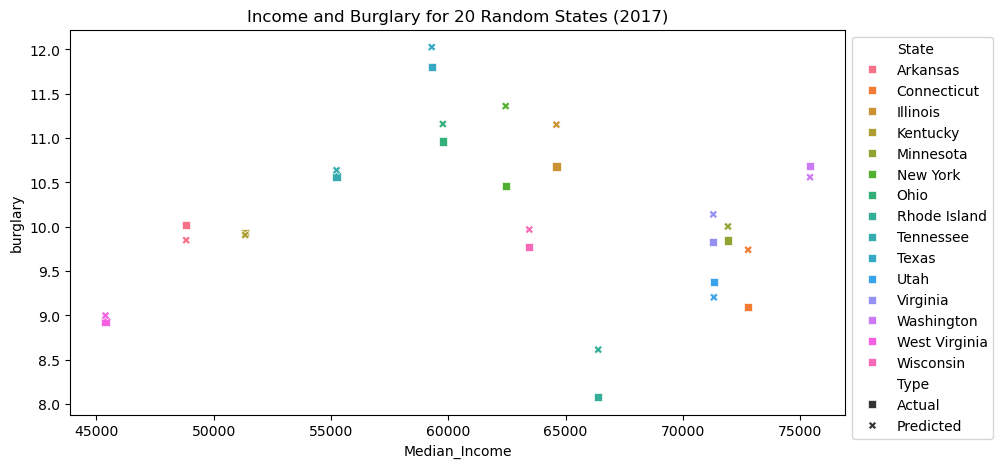

In [821]:
g = sns.scatterplot(data = burglary_2017_preds_actual, x='Median_Income',y='burglary',\
                hue='State', style = 'Type', markers = markers)
g.figure.set_size_inches(10,5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(title = "Income and Burglary for 20 Random States (2017)")

# Income and Burglary for 2018

In [822]:
burglary_2018= chosen_stats_burglary[chosen_stats_burglary['Year']==2018]
burglary_2018_actual = burglary_2018.drop(columns=['const','Binary','preds_burglary'])
burglary_2018_actual['Type'] = 'Actual'
burglary_2018_actual = burglary_2018_actual.rename(columns = {'actual_burglary':'burglary'})

burglary_2018_preds = burglary_2018.loc[:,['Year','Median_Income', 'preds_burglary','State']]
burglary_2018_preds = burglary_2018_preds.rename(columns = {'preds_burglary':'burglary'})
burglary_2018_preds['Type'] = 'Predicted'
burglary_2018_preds_actual = pd.concat([burglary_2018_actual , burglary_2018_preds], ignore_index=True, axis=0)
#burglary_2018_preds_actual

[Text(0.5, 1.0, 'Income and Burglary for 20 Random States (2018)')]

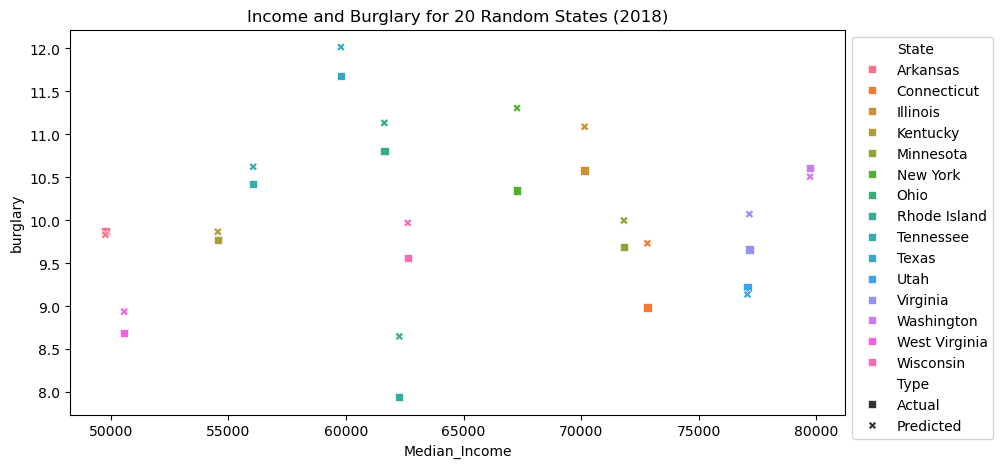

In [823]:
g = sns.scatterplot(data = burglary_2018_preds_actual, x='Median_Income',y='burglary',\
                hue='State', style = 'Type', markers = markers)
g.figure.set_size_inches(10,5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(title = "Income and Burglary for 20 Random States (2018)")

# Hypothesis 2

### States that are below the U.S unemployment average over the years 1980 to 2018 are more accurate in predicting violent crime than those below the national average

In [824]:
#avg unemployment in the US
us_avg = job_df.iloc[0, 1:]
#print(us_avg)
us_average = us_avg.sum()/us_avg.size
print(us_average)

6.264102564102564


In [825]:
#created a dictionary with all states and their respective unemployment averages across the years 1980 to 2018
dict_avg = {}
states = job_df.iloc[1:, 0].reset_index(drop=True) #rows 0,1,...50
#print(states)

#for x in range(1, 38):
for x in range(0,states.size):
    the_avg = job_df.iloc[x+1, 1:] #get the row for this state
    dict_avg[states[x]] = the_avg.sum()/(2018-1980) + 1

print(dict_avg)


{'Alabama': 8.339473684210525, 'Alaska': 8.976315789473684, 'Arizona': 7.371052631578947, 'Arkansas': 7.628947368421051, 'California': 8.39736842105263, 'Colorado': 6.46578947368421, 'Connecticut': 6.518421052631578, 'Delaware': 6.278947368421052, 'District of Columbia': 8.736842105263161, 'Florida': 7.197368421052631, 'Georgia': 7.1236842105263145, 'Hawaii': 5.7026315789473685, 'Idaho': 7.094736842105262, 'Illinois': 8.157894736842106, 'Indiana': 7.342105263157896, 'Iowa': 5.755263157894736, 'Kansas': 5.88157894736842, 'Kentucky': 8.06578947368421, 'Louisiana': 8.507894736842106, 'Maine': 6.776315789473684, 'Maryland': 6.360526315789474, 'Massachusetts': 6.457894736842107, 'Michigan': 9.092105263157896, 'Minnesota': 5.978947368421053, 'Mississippi': 8.807894736842107, 'Missouri': 7.123684210526315, 'Montana': 6.8921052631578945, 'Nebraska': 4.6421052631578945, 'Nevada': 7.75, 'New Hampshire': 5.3578947368421055, 'New Jersey': 7.221052631578949, 'New Mexico': 7.849999999999999, 'New Yo

In [826]:
less_dict = []
more_dict = []
count = 2
dict_avg[states[count]]

for x in dict_avg:
    rate = dict_avg[x]
    if rate < us_average:
        less_dict.append(x)
    else:
        more_dict.append(x)

print(less_dict)
print(more_dict)


['Hawaii', 'Iowa', 'Kansas', 'Minnesota', 'Nebraska', 'New Hampshire', 'North Dakota', 'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Wyoming']
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Mississippi', 'Missouri', 'Montana', 'Nevada', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Washington', 'West Virginia', 'Wisconsin']


In [827]:
#now get the info for states that have above average
states_above_df = job_melt[ job_melt['Area'].isin(more_dict)]
states_above_df.head()

,Area,Year,UnemploymentRate
1,Alabama,1980,8.9
2,Alaska,1980,9.6
3,Arizona,1980,6.6
4,Arkansas,1980,7.6
5,California,1980,6.8


In [828]:
states_above_df = duckdb.sql('''Select  C.Violent_Crime, S.*
                             FROM states_above_df AS S JOIN crime_df AS C
                             ON  S.Year = C.Year AND S.Area = C.State''').df()
states_above_df.head()

,Violent_Crime,Area,Year,UnemploymentRate
0,1919,Alaska,1980,9.6
1,17320,Alabama,1980,8.9
2,7656,Arkansas,1980,7.6
3,210290,California,1980,6.8
4,15215,Colorado,1980,5.8


In [829]:
states_above_df = pd.get_dummies(states_above_df, prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['Area'])
states_above_df['Year'] = states_above_df['Year'].astype(int)
states_above_df.head()

,Violent_Crime,Year,UnemploymentRate,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,Tennessee,Texas,Washington,West Virginia,Wisconsin
0,1919,1980,9.6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17320,1980,8.9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7656,1980,7.6,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,210290,1980,6.8,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15215,1980,5.8,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Actually train the model for years 1980-2018; income and violent crime rate for states above average

In [830]:
X_train_above, X_test_above, Y_train_above, Y_test_above = \
  train_test_split(states_above_df.iloc[:, 1:],states_above_df['Violent_Crime'],\
                    test_size=.30, shuffle=False)
X_train_above = sm.add_constant(X_train_above)
model_above = sm.OLS( Y_train_above,X_train_above).fit()
#model.summary()

In [831]:
X_test_above = sm.add_constant(X_test_above)
preds_above = model_above.predict(X_test_above)
y_above_df = pd.DataFrame(data = {"Preds":preds_above, "Actual":Y_test_above})
y_above_df.head()

,Preds,Actual
1064,7026.161604,7866
1065,-281.314908,5048
1066,123445.548808,94087
1067,-693.544532,3348
1068,83410.052612,53556


In [832]:
print( f"MAE for predicting violent crime rate using states above national average: {mean_absolute_error(preds_above,Y_test_above)}")
print( f"RSME for predicting violent crime rate using states above national average: {root_mean_squared_error(preds_above,Y_test_above)}")

MAE for predicting violent crime rate using states above national average: 7915.812378514861
RSME for predicting violent crime rate using states above national average: 15479.315695712612


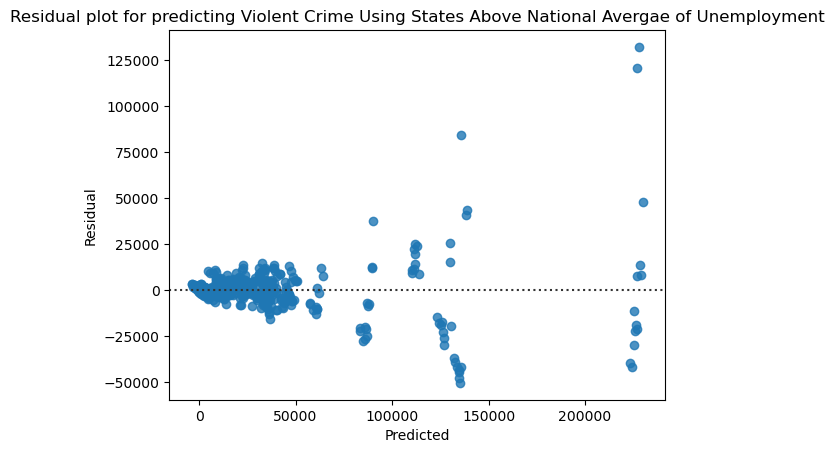

In [833]:
ax = sns.residplot(data= y_above_df, x = 'Preds', y = 'Actual')
ax.set(xlabel = "Predicted", ylabel= "Residual", title="Residual plot for predicting Violent Crime Using States Above National Avergae of Unemployment");

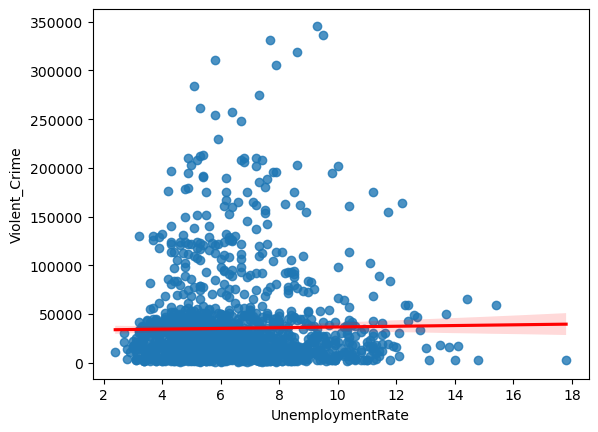

In [834]:
sns.regplot(x = states_above_df['UnemploymentRate'], y = states_above_df['Violent_Crime'], line_kws = {"color":"red"});

MAE for predicting violent crime rate using states above national average: 0.21924054627991002
RSME for predicting violent crime rate using states above national average: 0.27352759131431054


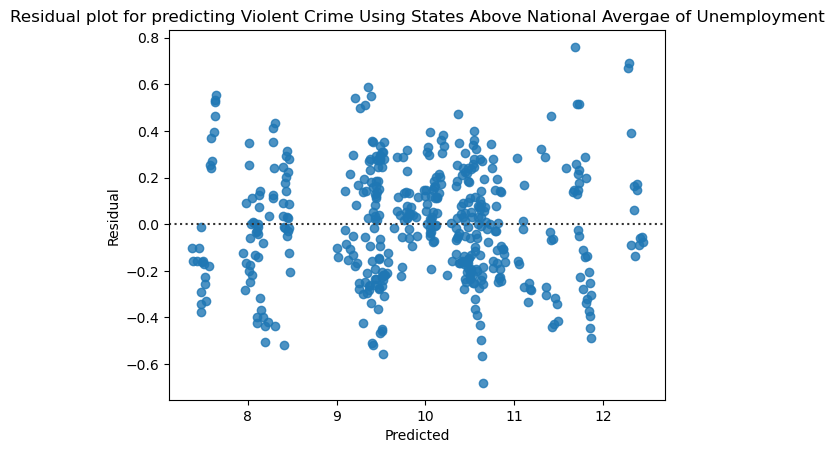

In [863]:
states_above_df['log_unemployment'] = np.log(states_above_df['UnemploymentRate'])
states_above_df['log_crime'] = np.log(states_above_df['Violent_Crime'])
modifed_df = states_above_df.drop(columns = "UnemploymentRate")

#print(modifed_df.columns)
X_train_above, X_test_above, Y_train_above, Y_test_above = \
  train_test_split(states_above_df.iloc[:, 1:-1],modifed_df['log_crime'],\
                    test_size=.30, shuffle=False)
X_train_above = sm.add_constant(X_train_above)
model_above = sm.OLS( Y_train_above,X_train_above).fit()

X_test_above = sm.add_constant(X_test_above)
preds_above = model_above.predict(X_test_above)
y_above_df = pd.DataFrame(data = {"Preds":preds_above, "Actual":Y_test_above})

y_above_df.head()

ax = sns.residplot(data= y_above_df, x = 'Preds', y = 'Actual')
ax.set(xlabel = "Predicted", ylabel= "Residual", title="Residual plot for predicting Violent Crime Using States Above National Avergae of Unemployment");

print( f"MAE for predicting violent crime rate using states above national average: {mean_absolute_error(preds_above,Y_test_above)}")
print( f"RSME for predicting violent crime rate using states above national average: {root_mean_squared_error(preds_above,Y_test_above)}")

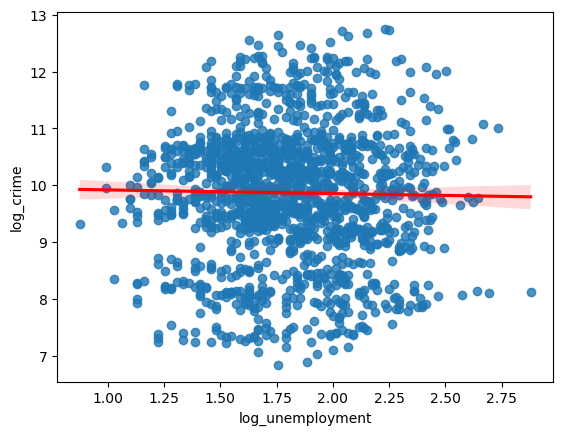

In [859]:
sns.regplot(x = states_above_df['log_unemployment'], y = states_above_df['log_crime'], line_kws = {"color":"red"});

In [837]:
#heatmap for actual values


# Now train model for years 1980-2018; states with unemployment rate below average, violent crime rate

In [838]:
states_below_df = job_melt[ job_melt['Area'].isin(less_dict)]
states_below_df.head()

,Area,Year,UnemploymentRate
12,Hawaii,1980,5.0
16,Iowa,1980,6.0
17,Kansas,1980,4.4
24,Minnesota,1980,5.8
28,Nebraska,1980,3.9


In [839]:
states_below_df = duckdb.sql('''Select  C.Violent_Crime, S.*
                             FROM states_below_df AS S JOIN crime_df AS C
                             ON  S.Year = C.Year AND S.Area = C.State''').df()
states_below_df.head()

,Violent_Crime,Area,Year,UnemploymentRate
0,9168,Kansas,1980,4.4
1,352,North Dakota,1980,4.9
2,3512,Nebraska,1980,3.9
3,4425,Utah,1980,6.2
4,16355,Virginia,1980,5.2


In [840]:
states_below_df = pd.get_dummies(states_below_df, prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['Area'])
states_below_df['Year'] = states_below_df['Year'].astype(int)
states_below_df.head()

,Violent_Crime,Year,UnemploymentRate,Iowa,Kansas,Minnesota,Nebraska,New Hampshire,North Dakota,South Dakota,Utah,Vermont,Virginia,Wyoming
0,9168,1980,4.4,0,1,0,0,0,0,0,0,0,0,0
1,352,1980,4.9,0,0,0,0,0,1,0,0,0,0,0
2,3512,1980,3.9,0,0,0,1,0,0,0,0,0,0,0
3,4425,1980,6.2,0,0,0,0,0,0,0,1,0,0,0
4,16355,1980,5.2,0,0,0,0,0,0,0,0,0,1,0


In [841]:
X_train_below, X_test_below, Y_train_below, Y_test_below = \
  train_test_split(states_below_df.iloc[:,1:],
                   states_below_df['Violent_Crime'], test_size=.30, shuffle=False)
#print(Y_test)
X_train_below = sm.add_constant(X_train_below)
model_below = sm.OLS( Y_train_below,X_train_below).fit()
#model.summary()

In [842]:
X_test_below = sm.add_constant(X_test_below)
preds_below = model_below.predict(X_test_below)
y_below_df = pd.DataFrame(data = {"Preds":preds_below, "Actual":Y_test_below})
y_below_df.head()

,Preds,Actual
327,1446.261847,775
328,2184.911415,1212
329,3798.416198,3362
330,8725.378708,8484
331,11175.272298,10235


In [843]:
print( f"MAE for predicting violent crime rate using states below national average: {mean_absolute_error(preds_below,Y_test_below)}")
print( f"RSME for predicting violent crime rate using states below national average: {root_mean_squared_error(preds_below,Y_test_below)}")

MAE for predicting violent crime rate using states below national average: 877.0012541509345
RSME for predicting violent crime rate using states below national average: 1236.8501710792561


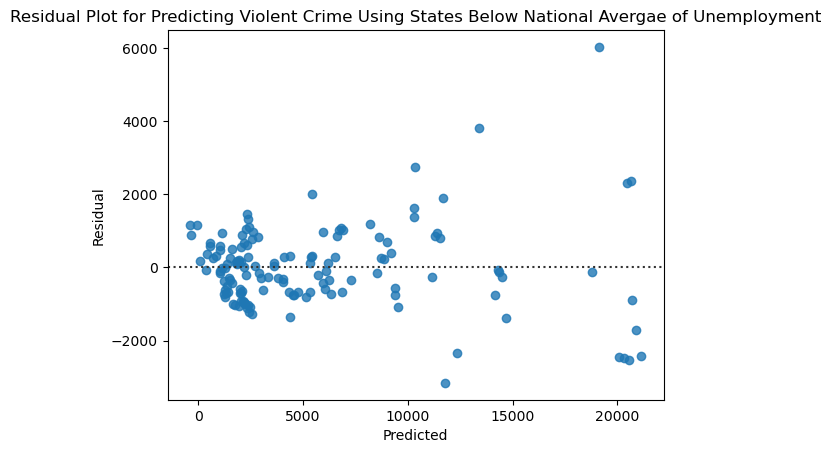

In [844]:
ax = sns.residplot(data= y_below_df, x = 'Preds', y = 'Actual')
ax.set(xlabel = "Predicted", ylabel= "Residual", title="Residual Plot for Predicting Violent Crime Using States Below National Avergae of Unemployment");

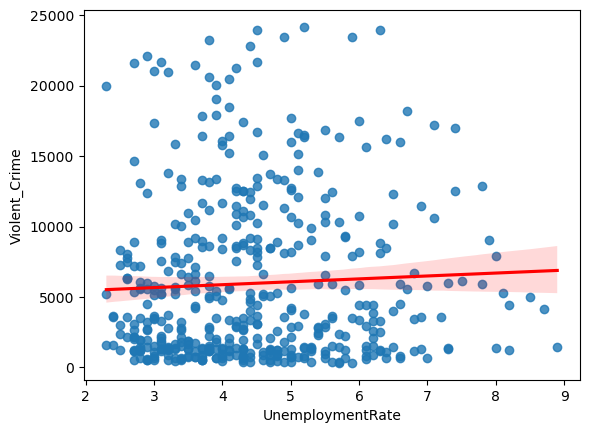

In [864]:
sns.regplot(x = states_below_df['UnemploymentRate'], y = states_below_df['Violent_Crime'], line_kws = {"color":"red"});

MAE for predicting violent crime rate using states below national average: 0.22514088308826197
RSME for predicting violent crime rate using states below national average: 0.29602961420061813


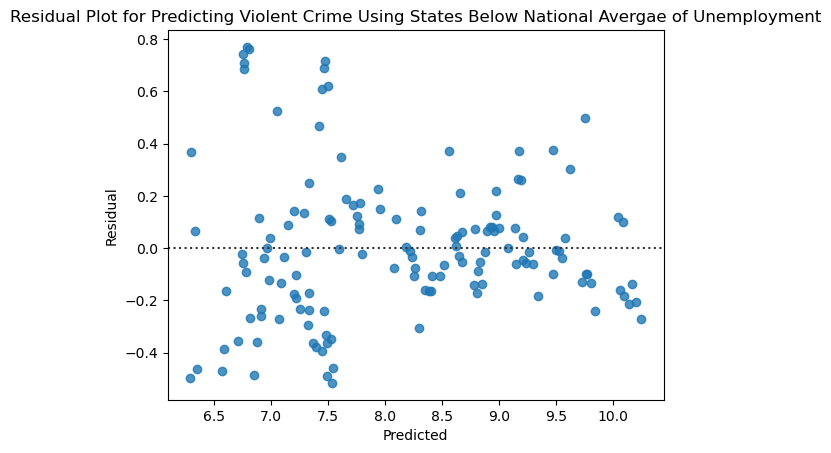

In [866]:
states_below_df['log_crime'] = np.log(states_below_df['Violent_Crime'])

X_train_below, X_test_below, Y_train_below, Y_test_below = \
  train_test_split(states_below_df.iloc[:,1:-1],
                   states_below_df['log_crime'], test_size=.30, shuffle=False)
#print(Y_test)
X_train_below = sm.add_constant(X_train_below)
model_below = sm.OLS( Y_train_below,X_train_below).fit()
#model.summary()

X_test_below = sm.add_constant(X_test_below)
preds_below = model_below.predict(X_test_below)
y_below_df = pd.DataFrame(data = {"Preds":preds_below, "Actual":Y_test_below})
y_below_df.head()

print( f"MAE for predicting violent crime rate using states below national average: {mean_absolute_error(preds_below,Y_test_below)}")
print( f"RSME for predicting violent crime rate using states below national average: {root_mean_squared_error(preds_below,Y_test_below)}")

ax = sns.residplot(data= y_below_df, x = 'Preds', y = 'Actual')
ax.set(xlabel = "Predicted", ylabel= "Residual", title="Residual Plot for Predicting Violent Crime Using States Below National Avergae of Unemployment");


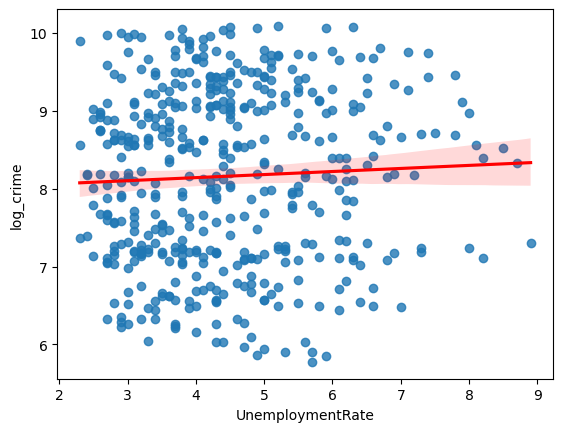

In [867]:
sns.regplot(x = states_below_df['UnemploymentRate'], y = states_below_df['log_crime'], line_kws = {"color":"red"});

# Hypothesis 3
### Income, population, unemployment and poverty can best determine the sub-category of homicide within the 4 categories of violent crime for each state regardless of year


In [845]:
crime_job = duckdb.sql('''SELECT C.State, C.Year, UnemploymentRate,
                               C.Population,
                               FROM crime_df AS C
                               JOIN job_melt AS J ON
                               C.Year = J.Year AND J.Area = C.State
                               ''').df()
cj_poverty = duckdb.sql('''SELECT C.State, C.Year, C.Population, UnemploymentRate, PovertyPercent
                               FROM crime_job AS C
                               JOIN poverty_concat AS P ON
                               C.Year = P.Year AND C.State = P.State
                               ''').df()
four_factors= duckdb.sql('''SELECT C.State, C.Year, C.Population, UnemploymentRate, PovertyPercent,
                        Median_Income
                               FROM cj_poverty AS C
                               JOIN income_melt AS I ON
                               C.Year = I.Year AND C.State = I.State
                               ORDER BY C.Year ASC''').df()
four_factors.head() #2013 - 2018

,State,Year,Population,UnemploymentRate,PovertyPercent,Median_Income
0,Alabama,2013,4833996,7.2,16.7,47320.0
1,Alaska,2013,737259,7.0,10.9,72472.0
2,Arizona,2013,6634997,7.7,20.2,52611.0
3,Arkansas,2013,2958765,7.2,17.1,39376.0
4,California,2013,38431393,8.9,14.9,60794.0


# MODEL FOR RAPE

In [870]:
rape_fourfactors= duckdb.sql('''SELECT C.Rape, F.*
                               FROM crime_df AS C
                               JOIN four_factors AS F ON
                               C.Year = F.Year AND C.State = F.State
                               ORDER BY C.Year ASC''').df()
rape_fourfactors = pd.get_dummies(rape_fourfactors, prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['State'])
#print(rape_fourfactors)
X4_train_rape, X4_test_rape, Y4_train_rape, Y4_test_rape = \
  train_test_split(rape_fourfactors.iloc[:,1:], rape_fourfactors['Rape'],\
                   test_size=.30, shuffle=False)
X4_train_rape = sm.add_constant(X4_train_rape)
model_rape = sm.OLS(Y4_train_rape,X4_train_rape).fit()
model_rape.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rape   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     372.1
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          3.06e-167
Time:                        15:40:59   Log-Likelihood:                -1693.3
No. Observations:                 245   AIC:                             3497.
Df Residuals:                     190   BIC:                             3689.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.335e+04    6.7e+04      0.647      0.519   -8.89e+04    1.76e+05
Year               -25.2902     33.294     -0.760      0.448     -90.964      40.384
Population           0.0019      0.000     11.033      0.000       0.002       0.002
UnemploymentRate   -66.5489     37.403     -1.779      0.077    -140.328       7.231
PovertyPercent      13.4160     17.912      0.749      0.455     -21.916      48.748
Median_Income        0.0143      0.008      1.785      0.076      -0.002       0.030
Alaska            6405.1410    767.548      8.345      0.000    4891.131    7919.151
Arizona          -2599.2507    387.206     -6.713      0.000   -3363.026   -1835.475
Arkansas          3296.8095    378.494      8.710      0.000    2550.220    4043.399
California       -5.512e+04   5861.979     -9.403      0.000   -6.67e+04   -4.36e+04
Colorado          -183.7796    263.086     -0.699      0.486    -702.724     335.165
Connecticut        871.7753    359.199      2.427      0.016     163.245    1580.306
Delaware          5597.2542    718.121      7.794      0.000    4180.740    7013.768
Florida          -2.382e+04   2616.636     -9.103      0.000    -2.9e+04   -1.87e+04
Georgia          -9033.2682    929.201     -9.722      0.000   -1.09e+04   -7200.393
Hawaii            4612.3950    665.988      6.926      0.000    3298.715    5926.075
Idaho             4575.6542    604.977      7.563      0.000    3382.321    5768.988
Illinois         -1.243e+04   1397.072     -8.894      0.000   -1.52e+04   -9670.028
Indiana          -3161.3509    353.543     -8.942      0.000   -3858.725   -2463.977
Iowa              2155.4384    397.188      5.427      0.000    1371.975    2938.902
Kansas            2926.0533    408.584      7.161      0.000    2120.111    3731.996
Kentucky           389.3660    213.415      1.824      0.070     -31.600     810.332
Louisiana          -34.0387    196.832     -0.173      0.863    -422.296     354.219
Maine             4980.6499    651.382      7.646      0.000    3695.780    6265.520
Maryland         -2846.1972    332.964     -8.548      0.000   -3502.977   -2189.417
Massachusetts    -3792.8940    401.228     -9.453      0.000   -4584.327   -3001.461
Michigan         -4983.1334    892.946     -5.581      0.000   -6744.495   -3221.772
Minnesota        -1455.4546    274.739     -5.298      0.000   -1997.384    -913.525
Mississippi       2670.6673    373.461      7.151      0.000    1934.005    3407.329
Missouri         -2065.9710    285.154     -7.245      0.000   -2628.445   -1503.497
Montana           5612.9533    704.762      7.964      0.000    4222.790    7003.116
Nebraska          4177.3261    586.833      7.118      0.000    3019.782    5334.870
Nevada            3314.9961    397.850      8.332      0.000    2530.226    4099.766
New Hampshire     4874.

In [847]:
#make predictions using rape model
X4_test_rape = sm.add_constant(X4_test_rape)
rape4_preds = model_rape.predict(X4_test_rape)
print( f"MAE for predicting rape using the four factors: {mean_absolute_error(Y4_test_rape, rape4_preds)}")
print( f"RSME for predicting rape using the four factors: {root_mean_squared_error(Y4_test_rape, rape4_preds)}")

MAE for predicting rape using the four factors: 311.51113832282806
RSME for predicting rape using the four factors: 513.7375185739035


## MODEL FOR HOMICIDE

In [871]:
homicide_fourfactors= duckdb.sql('''SELECT C.Homicide, F.*
                               FROM crime_df AS C
                               JOIN four_factors AS F ON
                               C.Year = F.Year AND C.State = F.State
                               ORDER BY C.Year ASC''').df()
homicide_fourfactors = pd.get_dummies(homicide_fourfactors, prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['State'])
#print(homicide_fourfactors)

X4_train_homi, X4_test_homi, Y4_train_homi, Y4_test_homi = \
  train_test_split(homicide_fourfactors.iloc[:,1:], homicide_fourfactors['Homicide'],\
                   test_size=.30, shuffle=False)
X4_train_homi = sm.add_constant(X4_train_homi)
model_homicide = sm.OLS(Y4_train_homi,X4_train_homi).fit()
model_homicide.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Homicide   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     402.7
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          1.84e-170
Time:                        15:44:22   Log-Likelihood:                -1201.4
No. Observations:                 245   AIC:                             2513.
Df Residuals:                     190   BIC:                             2705.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.392e+04   8998.286     -2.658      0.009   -4.17e+04   -6166.430
Year                11.6447      4.470      2.605      0.010       2.827      20.462
Population           0.0002   2.32e-05      7.072      0.000       0.000       0.000
UnemploymentRate     2.8045      5.022      0.558      0.577      -7.101      12.710
PovertyPercent      -2.9717      2.405     -1.236      0.218      -7.715       1.772
Median_Income        0.0007      0.001      0.694      0.489      -0.001       0.003
Alaska             345.2953    103.049      3.351      0.001     142.027     548.563
Arizona           -302.7253     51.986     -5.823      0.000    -405.268    -200.182
Arkansas           155.7467     50.816      3.065      0.002      55.511     255.982
California       -4122.4606    787.018     -5.238      0.000   -5674.875   -2570.046
Colorado          -280.7717     35.321     -7.949      0.000    -350.444    -211.099
Connecticut        -76.4630     48.225     -1.586      0.115    -171.589      18.663
Delaware           336.8930     96.414      3.494      0.001     146.715     527.071
Florida          -1809.8695    351.304     -5.152      0.000   -2502.827   -1116.912
Georgia           -597.4079    124.753     -4.789      0.000    -843.486    -351.330
Hawaii             226.1713     89.414      2.529      0.012      49.799     402.543
Idaho              210.1941     81.223      2.588      0.010      49.979     370.409
Illinois          -883.9677    187.568     -4.713      0.000   -1253.951    -513.984
Indiana           -268.4234     47.466     -5.655      0.000    -362.051    -174.795
Iowa               -15.4397     53.326     -0.290      0.772    -120.626      89.747
Kansas              87.7421     54.856      1.600      0.111     -20.462     195.946
Kentucky           -67.1190     28.653     -2.343      0.020    -123.637     -10.601
Louisiana          209.9811     26.426      7.946      0.000     157.854     262.108
Maine              250.0053     87.453      2.859      0.005      77.501     422.509
Maryland          -118.7489     44.703     -2.656      0.009    -206.927     -30.571
Massachusetts     -541.0515     53.868    -10.044      0.000    -647.308    -434.795
Michigan          -584.8956    119.885     -4.879      0.000    -821.373    -348.419
Minnesota         -356.7134     36.886     -9.671      0.000    -429.472    -283.955
Mississippi        222.3707     50.140      4.435      0.000     123.468     321.273
Missouri          -116.4016     38.284     -3.040      0.003    -191.918     -40.885
Montana            313.0892     94.620      3.309      0.001     126.449     499.730
Nebraska           186.7957     78.787      2.371      0.019      31.386     342.205
Nevada             158.8729     53.415      2.974      0.003      53.511     264.235
New Hampshire      218.

In [849]:
#make predictions using homicide model
X4_test_homi = sm.add_constant(X4_test_homi)
homicide4_preds = model_homicide.predict(X4_test_homi)
print( f"MAE for predicting homicide using the four factors: {mean_absolute_error( Y4_test_homi,homicide4_preds)}")
print( f"RSME for predicting homicide using the four factors: {root_mean_squared_error(Y4_test_homi, homicide4_preds)}")

MAE for predicting homicide using the four factors: 56.87366284538613
RSME for predicting homicide using the four factors: 71.35952924641684


# MODEL FOR AGGRAVATED ASSAULT

In [875]:
assault_fourfactors= duckdb.sql('''SELECT C.Aggravated_Assault, F.*
                               FROM crime_df AS C
                               JOIN four_factors AS F ON
                               C.Year = F.Year AND C.State = F.State
                               ORDER BY C.Year ASC''').df()
assault_fourfactors = pd.get_dummies(assault_fourfactors, prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['State'])
#print(assault_fourfactors)

X4_train_assault, X4_test_assault, Y4_train_assault, Y4_test_assault = \
  train_test_split(assault_fourfactors.iloc[:,1:], assault_fourfactors['Aggravated_Assault'],\
                   test_size=.30, shuffle=False)
X4_train_assault = sm.add_constant(X4_train_assault)
model_assault = sm.OLS(Y4_train_assault,X4_train_assault).fit()
model_assault.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Aggravated_Assault   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1345.
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          6.70e-220
Time:                        15:45:16   Log-Likelihood:                -2022.1
No. Observations:                 245   AIC:                             4154.
Df Residuals:                     190   BIC:                             4347.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.722e+05   2.56e+05     -0.671      0.503   -6.78e+05    3.34e+05
Year                80.2801    127.388      0.630      0.529    -170.997     331.557
Population           0.0051      0.001      7.773      0.000       0.004       0.006
UnemploymentRate  -139.3850    143.110     -0.974      0.331    -421.674     142.904
PovertyPercent     -16.1359     68.534     -0.235      0.814    -151.321     119.050
Median_Income        0.0273      0.031      0.891      0.374      -0.033       0.088
Alaska            9334.4523   2936.728      3.179      0.002    3541.673    1.51e+04
Arizona          -6055.1126   1481.497     -4.087      0.000   -8977.408   -3132.817
Arkansas          5812.5060   1448.161      4.014      0.000    2955.967    8669.045
California       -9.434e+04   2.24e+04     -4.206      0.000   -1.39e+05   -5.01e+04
Colorado         -7614.2644   1006.598     -7.564      0.000   -9599.808   -5628.721
Connecticut      -4228.4634   1374.339     -3.077      0.002   -6939.385   -1517.542
Delaware          8133.9796   2747.615      2.960      0.003    2714.231    1.36e+04
Florida          -3.093e+04      1e+04     -3.089      0.002   -5.07e+04   -1.12e+04
Georgia          -1.925e+04   3555.231     -5.415      0.000   -2.63e+04   -1.22e+04
Hawaii            4072.1046   2548.148      1.598      0.112    -954.188    9098.398
Idaho             4171.6853   2314.712      1.802      0.073    -394.149    8737.519
Illinois         -2.692e+04   5345.362     -5.036      0.000   -3.75e+04   -1.64e+04
Indiana          -8854.8466   1352.698     -6.546      0.000   -1.15e+04   -6186.612
Iowa                38.1079   1519.687      0.025      0.980   -2959.517    3035.732
Kansas            2522.9792   1563.289      1.614      0.108    -560.652    5606.611
Kentucky         -7616.2686    816.549     -9.327      0.000   -9226.935   -6005.602
Louisiana         3630.9420    753.104      4.821      0.000    2145.424    5116.460
Maine             4114.9044   2492.265      1.651      0.100    -801.159    9030.968
Maryland         -5376.8858   1273.958     -4.221      0.000   -7889.803   -2863.969
Massachusetts    -6673.7866   1535.143     -4.347      0.000   -9701.900   -3645.673
Michigan         -1.278e+04   3416.517     -3.740      0.000   -1.95e+04   -6039.740
Minnesota        -1.164e+04   1051.182    -11.075      0.000   -1.37e+04   -9568.097
Mississippi         16.8066   1428.905      0.012      0.991   -2801.749    2835.362
Missouri         -1613.3075   1091.031     -1.479      0.141   -3765.398     538.783
Montana           7298.9035   2696.502      2.707      0.007    1979.978    1.26e+04
Nebraska          3081.3503   2245.291      1.372      0.172   -1347.549    7510.250
Nevada            6661.1389   1522.219      4.376      0.000    3658.518    9663.760
New Hampshire     3978.

In [851]:
#make predictions using assault model
X4_test_assault = sm.add_constant(X4_test_assault)
assault4_preds = model_assault.predict(X4_test_assault)
print( f"MAE for predicting aggravated assault using the four factors: {mean_absolute_error( Y4_test_assault,assault4_preds)}")
print( f"RSME for predicting aggravated assault using the four factors: {root_mean_squared_error(Y4_test_assault,assault4_preds)}")

MAE for predicting aggravated assault using the four factors: 1381.499564508074
RSME for predicting aggravated assault using the four factors: 2261.354298039466


# MODEL FOR ROBBERY

In [876]:
robbery_fourfactors= duckdb.sql('''SELECT C.Robbery, F.*
                               FROM crime_df AS C
                               JOIN four_factors AS F ON
                               C.Year = F.Year AND C.State = F.State
                               ORDER BY C.Year ASC''').df()
robbery_fourfactors = pd.get_dummies(robbery_fourfactors , prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['State'])
#print(robbery_fourfactors)

X4_train_robbery, X4_test_robbery, Y4_train_robbery, Y4_test_robbery = \
  train_test_split(robbery_fourfactors .iloc[:,1:], robbery_fourfactors ['Robbery'],\
                   test_size=.30, shuffle=False)
X4_train_robbery = sm.add_constant(X4_train_robbery)
model_robbery = sm.OLS(Y4_train_robbery,X4_train_robbery).fit()
model_robbery.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Robbery   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     946.8
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          1.79e-205
Time:                        15:45:52   Log-Likelihood:                -1904.5
No. Observations:                 245   AIC:                             3919.
Df Residuals:                     190   BIC:                             4112.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.958e+05   1.59e+05     -1.864      0.064   -6.09e+05    1.72e+04
Year               148.2717     78.846      1.881      0.062      -7.255     303.798
Population           0.0002      0.000      0.569      0.570      -0.001       0.001
UnemploymentRate   388.3461     88.577      4.384      0.000     213.625     563.067
PovertyPercent     -88.8426     42.419     -2.094      0.038    -172.515      -5.170
Median_Income       -0.0087      0.019     -0.459      0.647      -0.046       0.029
Alaska           -3361.2988   1817.672     -1.849      0.066   -6946.708     224.110
Arizona           1721.6003    916.965      1.877      0.062     -87.138    3530.339
Arkansas         -1760.2523    896.331     -1.964      0.051   -3528.291       7.787
California        3.984e+04   1.39e+04      2.870      0.005    1.25e+04    6.72e+04
Colorado         -1359.0718    623.028     -2.181      0.030   -2588.013    -130.131
Connecticut      -1529.0730    850.639     -1.798      0.074   -3206.983     148.837
Delaware         -2402.7752   1700.621     -1.413      0.159   -5757.299     951.748
Florida           1.375e+04   6196.596      2.219      0.028    1526.481     2.6e+04
Georgia           6588.3377   2200.491      2.994      0.003    2247.808    1.09e+04
Hawaii           -2263.7243   1577.162     -1.435      0.153   -5374.720     847.272
Idaho            -3384.8025   1432.678     -2.363      0.019   -6210.800    -558.805
Illinois          9667.8009   3308.482      2.922      0.004    3141.727    1.62e+04
Indiana           1932.2752    837.245      2.308      0.022     280.786    3583.764
Iowa             -2716.7049    940.602     -2.888      0.004   -4572.068    -861.342
Kansas           -2187.0110    967.589     -2.260      0.025   -4095.608    -278.415
Kentucky         -1051.6153    505.399     -2.081      0.039   -2048.529     -54.702
Louisiana         1341.8201    466.129      2.879      0.004     422.367    2261.273
Maine            -3326.7918   1542.574     -2.157      0.032   -6369.562    -284.022
Maryland          5144.1452    788.509      6.524      0.000    3588.789    6699.501
Massachusetts     1082.0673    950.169      1.139      0.256    -792.167    2956.301
Michigan          2440.8107   2114.634      1.154      0.250   -1730.365    6611.986
Minnesota         -634.7861    650.623     -0.976      0.330   -1918.159     648.587
Mississippi      -1735.5432    884.413     -1.962      0.051   -3480.073       8.986
Missouri           953.8770    675.288      1.413      0.159    -378.147    2285.901
Montana          -3108.0007   1668.985     -1.862      0.064   -6400.120     184.119
Nebraska         -2113.9860   1389.710     -1.521      0.130   -4855.229     627.257
Nevada            1002.7354    942.169      1.064      0.289    -855.720    2861.191
New Hampshire    -2870.

In [853]:
#make predictions using burglary model
X4_test_robbery = sm.add_constant(X4_test_robbery)
robbery4_preds = model_robbery.predict(X4_test_robbery)
print( f"MAE for predicting robbery using the four factors: {mean_absolute_error( Y4_test_robbery,robbery4_preds)}")
print( f"RSME for predicting robbery using the four factors: {root_mean_squared_error(Y4_test_robbery,robbery4_preds)}")

MAE for predicting robbery using the four factors: 922.7968418143154
RSME for predicting robbery using the four factors: 1557.551744183678
